In [123]:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
# http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd




def classify_data(X_train, y_train, X_test, pred_home):
    
    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "QDA"]

    
    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]    

    
    # preprocess dataset, split into training and test part
    #X = StandardScaler().fit_transform(X)
    

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        clas  = clf.fit(X_train, y_train)

        print name 
        pred_home['pred_home_' + name.replace(' ', '_')] = clas.predict(X_test)
 
    pred_home.to_csv(outfolder + '/user_homes/' + city + '_ML_home_classification_RESULTS.csv', sep='\t')

    

    
# parse city data
city = 'bristol'
outfolder =  '../ProcessedData/' + city + '/'


### training data budapest_ML_feature_has_home_TRAIN.csv
df_train =  pd.read_csv(outfolder + '/user_homes/' + city + '_ML_feature_has_home_TRAIN.csv', index_col=0, sep = '\t')
X_train  =  df_train.drop(columns = ['home', 'venue', 'user']).fillna(0)
y_train  =  df_train['home']


### test data budapest_ML_feature_has_home_TEST
df_test =  pd.read_csv(outfolder + '/user_homes/' + city + '_ML_feature_has_home_TEST.csv', index_col=0, sep = '\t')
X_test  =  df_test.drop(columns = ['home', 'venue', 'user']).fillna(0)


# get the output as home-venue-home-not-home pairs
pred_home          = pd.DataFrame()
pred_home['user']  = df_test['user']
pred_home['venue'] = df_test['venue']


classify_data(X_train, y_train, X_test, pred_home) 




Nearest Neighbors
Linear SVM
RBF SVM


KeyboardInterrupt: 

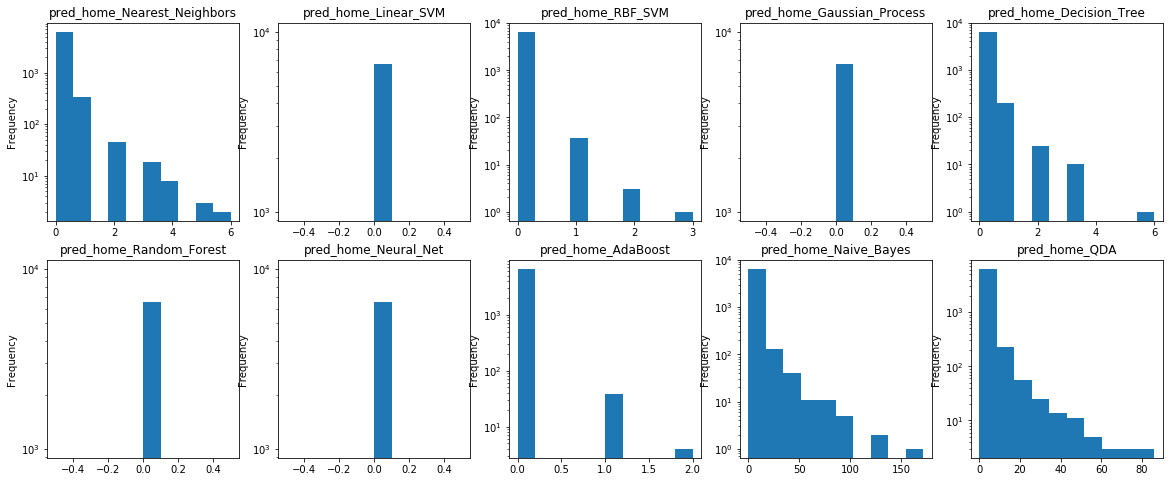

In [131]:
df    = pd.read_csv(outfolder + '/user_homes/' + city + '_ML_home_classification_RESULTS.csv', sep = '\t', index_col=0)
f, ax = plt.subplots(2, 5, figsize=(20, 8))
ind   = [(i,j) for i in range(2) for j in range(5)]



df_s = df.groupby( ['user' ]).sum()


for column, (k,l) in zip(df_s, ind):
    df_s[column].plot(kind = 'hist', ax = ax[k,l], logy = True, title = column)
   
        
#f.savefig(outfolder + '/user_homes/' + city + '_ML_home_classification_distributions.png')

In [126]:
i = 0
j = 0

df_s = df.groupby( ['user' ]).sum()
df_c = pd.DataFrame()
ind   = [(i,j) for i in range(4) for j in range(4)]

for column, (i,j) in zip(df_s, ind):
    df_c[column.replace('pred_home_', '')] = df_s[column].value_counts()


In [120]:
df_c.to_csv(outfolder + '/user_homes/' + city + '_ML_feature_has_home_RES_count.csv' , sep = '\t')

In [ ]:
for column, (i,j) in zip(df_s, ind):
    df_c[column.replace('pred_home_', '')] = df_s[column].value_counts()


In [133]:
df_s = df.groupby( ['user' ]).sum()
df_s.head()

,pred_home_Nearest_Neighbors,pred_home_Linear_SVM,pred_home_RBF_SVM,pred_home_Gaussian_Process,pred_home_Decision_Tree,pred_home_Random_Forest,pred_home_Neural_Net,pred_home_AdaBoost,pred_home_Naive_Bayes,pred_home_QDA
user,,,,,,,,,,
932,0,0,0,0,0,0,0,0,1,1
3973,0,0,0,0,0,0,0,0,1,1
4955,0,0,0,0,0,0,0,0,3,2
5163,0,0,0,0,0,0,0,0,0,0
8413,0,0,0,0,0,0,0,0,1,0
